In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [ ]:
!cd yolov5 & pip install -r requirements.txt

`Start`

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import cv2

In [3]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in C:\Users\Lenovo/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-9-23 Python-3.12.3 torch-2.4.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
# Images
imgs = ['https://upload.wikimedia.org/wikipedia/commons/4/4f/Intersection_4way_overview.jpg']
# Inference
results = model(imgs)

# Results
results.print()

C:\Users\Lenovo/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 661x1000 9 persons, 13 cars, 2 trucks, 3 traffic lights
Speed: 744.0ms pre-process, 301.1ms inference, 8.0ms NMS per image at shape (1, 3, 448, 640)


<function matplotlib.pyplot.show(close=None, block=None)>

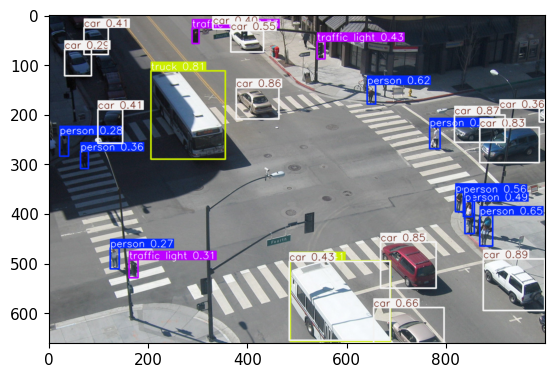

In [5]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show

In [ ]:
cap=cv2.VideoCapture(0) #here, cap =webcam(=0)
#cap=cv2.VideoCapture('examplecarchase.mp4') This detects in a video
while cap.isOpened():   
    ret, frame=cap.read() #input
    #Predictions:
    results=model(frame)

    cv2.imshow('smilee', np.squeeze(results.render()))
    #exit procedure:
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [3]:
import uuid
import os
import time

In [ ]:
IMAGES_PATH=os.path.join('data', 'images') #here, data=topfolder, images is inside it; /data/images
labels=['awake', 'drowsy']
number_imgs=20
cap=cv2.VideoCapture(0)
for label in labels: #loop through labels
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    #loop throgh images
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number{}'.format(label, img_num))

        ret, frame=cap.read() #Webcam feed
        if not ret:  # Check if frame was captured successfully
            print("Failed to capture image")
            continue

        imgname=os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg') #Naming Image path

        cv2.imwrite(imgname,frame)#Writes image to file
        cv2.imshow('Image Collection', frame) #Show
        time.sleep(2)#Delay  between Captures

        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()qqqqqqqq

In [5]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [6]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\Lenovo\Desktop\Drowsiness': No such file or directory
YOLOv5  2024-9-23 Python-3.12.3 torch-2.4.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, war

Load Our Model

In [6]:
model=torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp9/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Lenovo/.cache\torch\hub\master.zip
YOLOv5  2024-9-23 Python-3.12.3 torch-2.4.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [11]:
img=os.path.join('data', 'images', 'example.jpg')

In [12]:
results=model(img)
results.print()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Lenovo\\Desktop\\Drowsiness Detection Using YOLOv5\\data\\images\\example.jpg'

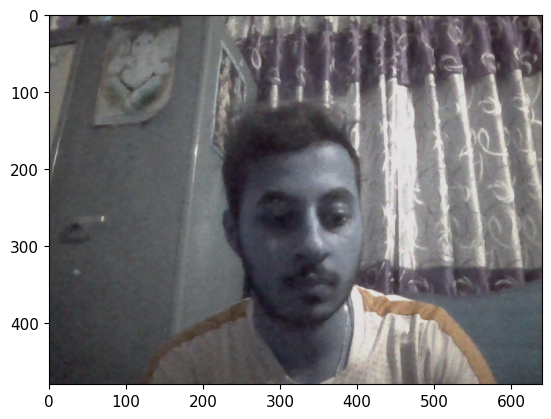

In [13]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

Live test


In [10]:
cap=cv2.VideoCapture(0) #here, cap =webcam(=0)
#cap=cv2.VideoCapture('examplecarchase.mp4') This detects in a video
while cap.isOpened():   
    ret, frame=cap.read() #input
    #Predictions:
    results=model(frame)

    cv2.imshow('smilee', np.squeeze(results.render()))
    #exit procedure:
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\Lenovo/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Lenovo/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Lenovo/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Lenovo/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Lenovo/.cache\torch\hub\ultralytics_yolov5_master\m